In [2]:
import zipfile
import io
import pandas as pd
import numpy as np
from IPython.display import display
from collections import defaultdict
import math

zipped_data_path = "../data/raw_data/ucsd-cse-151b-class-competition.zip"

dataframes = defaultdict(pd.DataFrame)
with zipfile.ZipFile(zipped_data_path, "r") as zip:
    for filename in zip.namelist():
        if filename.endswith(".csv"):
            with zip.open(filename) as f:
                dataframes.update({ filename : pd.read_csv(io.TextIOWrapper(f)) })

                # Lets take a look at the files
                print(f"FILE: {filename}")
                display(dataframes[filename].info())
                display(dataframes[filename].head())

FILE: metaData_taxistandsID_name_GPSlocation.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         63 non-null     int64  
 1   Descricao  63 non-null     object 
 2   Latitude   63 non-null     object 
 3   Longitude  62 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ KB


None

,ID,Descricao,Latitude,Longitude
0,1,Agra,41.1771457135,-8.609670
1,2,Alameda,41.15618964,-8.591064
2,3,Aldoar,41.1705249231,-8.665876
3,4,AlfÃ¢ndega,41.1437639911,-8.621803
4,5,Amial,41.1835097223,-8.612726


FILE: sampleSubmission.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TRIP_ID      320 non-null    object
 1   TRAVEL_TIME  320 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.1+ KB


None

,TRIP_ID,TRAVEL_TIME
0,T1,660
1,T2,660
2,T3,660
3,T4,660
4,T5,660


FILE: test_public.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRIP_ID       320 non-null    object 
 1   CALL_TYPE     320 non-null    object 
 2   ORIGIN_CALL   72 non-null     float64
 3   ORIGIN_STAND  123 non-null    float64
 4   TAXI_ID       320 non-null    int64  
 5   TIMESTAMP     320 non-null    int64  
 6   DAY_TYPE      320 non-null    object 
 7   MISSING_DATA  320 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 17.9+ KB


None

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA
0,T1,B,NaN,15.0,20000542,1408039037,A,False
1,T2,B,NaN,57.0,20000108,1408038611,A,False
2,T3,B,NaN,15.0,20000370,1408038568,A,False
3,T4,B,NaN,53.0,20000492,1408039090,A,False
4,T5,B,NaN,18.0,20000621,1408039177,A,False


FILE: train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710670 entries, 0 to 1710669
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   TRIP_ID       int64  
 1   CALL_TYPE     object 
 2   ORIGIN_CALL   float64
 3   ORIGIN_STAND  float64
 4   TAXI_ID       int64  
 5   TIMESTAMP     int64  
 6   DAY_TYPE      object 
 7   MISSING_DATA  bool   
 8   POLYLINE      object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 106.0+ MB


None

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


In [3]:
TAXI_METADATA = dataframes["metaData_taxistandsID_name_GPSlocation.csv"]
SAMPLE_SUBMISSION_DF = dataframes["sample_submission.csv"]
TEST_PUBLIC_DF = dataframes["test_public.csv"]
TRAIN_DF = dataframes["train.csv"]

In [4]:
# Lets remove the missing data
TRAIN_DF = TRAIN_DF[TRAIN_DF["MISSING_DATA"] != True]

In [5]:
import json

def calculate_travel_time(polyline: str) -> int:
    """
    Calculates the travel time of a trip. Is defined as
    (number of points - 1) * 15 seconds.
    
    :param polyline: The polyline of the trip.
    :return: The travel time of the trip.
    """
    return (len(json.loads(polyline)) - 1) * 15

TRAIN_DF["TRAVEL_TIME"] = TRAIN_DF["POLYLINE"].apply(calculate_travel_time)
TRAIN_DF.head()

C:\Users\Tyler Holston\AppData\Local\Temp\ipykernel_10024\466646351.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TRAIN_DF["TRAVEL_TIME"] = TRAIN_DF["POLYLINE"].apply(calculate_travel_time)


,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,TRAVEL_TIME
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",330
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",270
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...",960
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",630
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...",420


In [6]:
from datetime import datetime
def parse_time(x):
  # We are using python's builtin datetime library
  # https://docs.python.org/3/library/datetime.html#datetime.date.fromtimestamp

  # Each x is essentially a 1 row, 1 column pandas Series
  dt = datetime.fromtimestamp(x["TIMESTAMP"])
  return dt.year, dt.month, dt.day, dt.hour, dt.weekday()

# Because we are assigning multiple values at a time, we need to "expand" our computed (year, month, day, hour, weekday) tuples on 
# the column axis, or axis 1
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
TRAIN_DF[["YR", "MON", "DAY", "HR", "WK"]] = TRAIN_DF[["TIMESTAMP"]].apply(parse_time, axis=1, result_type="expand")
TEST_PUBLIC_DF[["YR", "MON", "DAY", "HR", "WK"]] = TEST_PUBLIC_DF[["TIMESTAMP"]].apply(parse_time, axis=1, result_type="expand")

C:\Users\Tyler Holston\AppData\Local\Temp\ipykernel_10024\621331120.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TRAIN_DF[["YR", "MON", "DAY", "HR", "WK"]] = TRAIN_DF[["TIMESTAMP"]].apply(parse_time, axis=1, result_type="expand")
C:\Users\Tyler Holston\AppData\Local\Temp\ipykernel_10024\621331120.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TRAIN_DF[["YR", "MON", "DAY", "HR", "WK"]] = TRAIN_DF[["TIMESTAMP"]].apply(parse_time, axis=1, result_type="expand")
C:\Users\Tyler Holston\AppData\Local

In [ ]:
def add_meta_taxi_data(x):
    if not math.isnan(x):
        return str(TAXI_METADATA.at[x-1, "Latitude"]) +"," + str(TAXI_METADATA.at[x-1, "Longitude"])

TRAIN_DF["START_LOCATION"] = TRAIN_DF['ORIGIN_STAND'].apply(add_meta_taxi_data)
TEST_PUBLIC_DF["START_LOCATION"] = TEST_PUBLIC_DF['ORIGIN_STAND'].apply(add_meta_taxi_data)
TRAIN_DF.head()

Using: 1692763/1710660


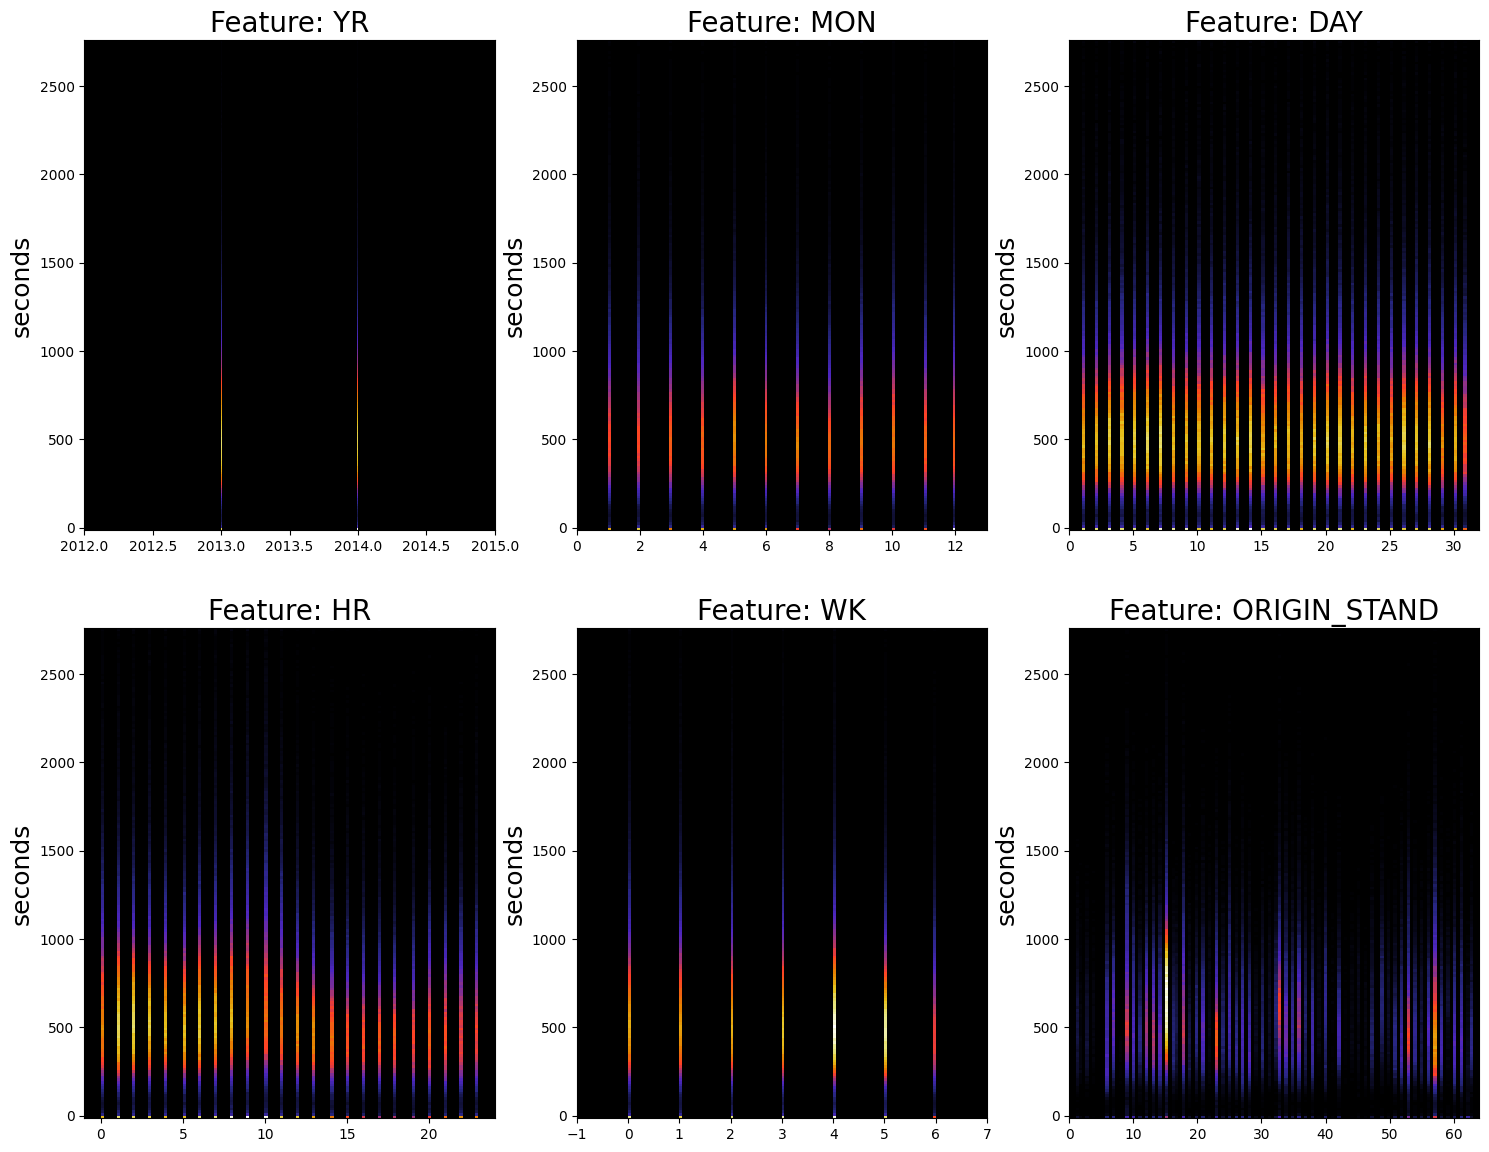

In [7]:
import matplotlib.pyplot as plt

mean, std = TRAIN_DF["TRAVEL_TIME"].mean(), TRAIN_DF["TRAVEL_TIME"].std()
median = TRAIN_DF["TRAVEL_TIME"].median()

# First n samples to analyze. Set to -1 to use all data
end = -1

outlier_threshold = 3

# "Choose all data, where the trip length is less than 3 standard deviations away from the mean"
# This is to remove outliers. Otherwise, our plots would look very squished (since there are some
# VERRRRRY long taxi trips in the dataset)
df_trimmed = TRAIN_DF[TRAIN_DF["TRAVEL_TIME"] < mean + outlier_threshold * std]

# Because our y-values only take on multiples of 15, we want just enough buckets in a histogram
# such that each buckets counts one value's frequency. (e.x. one bucket counts how many 15s trips, 
# how many 30s trips, etc. )
buckets = (int(mean + outlier_threshold * std) // 15)

print(f"Using: {len(df_trimmed)}/{len(TRAIN_DF)}")

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,14))

# Now, we visualize some features that we think might be useful
for idx, v in enumerate(["YR", "MON", "DAY", "HR", "WK", "ORIGIN_STAND"]):
  # idx // 3 = row, idx % 3 = column
  ax = axs[idx // 3, idx % 3]
  
  # Remove any rows with invalid values
  df_subset = df_trimmed.dropna(subset=v)
  
  # Create a histogram. Look up the documentation for more details
  ax.hist2d(df_subset[v][:end], df_subset["TRAVEL_TIME"][:end], cmap="CMRmap", bins=(120,buckets))
  
  # Some stylistic things to make the graphs look nice
  ax.set_xlim(ax.get_xlim()[0] - 1, ax.get_xlim()[1] + 1)
  ax.set_facecolor("black")
  ax.set_ylabel("seconds", fontsize=18)
  ax.set_title(f"Feature: {v}", fontsize=20)


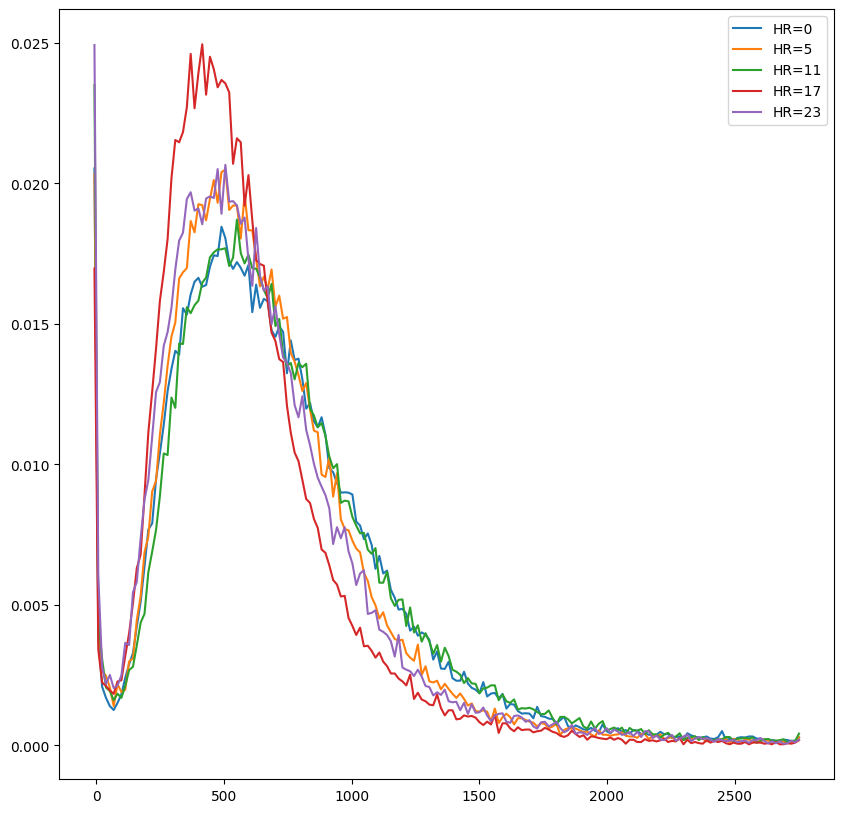

In [8]:
plt.figure(figsize=(10,10))
for v in [0, 5, 11, 17, 23]:
  # Filter data where the HR matches v
  hourly_data = df_trimmed[df_trimmed["HR"] == v]["TRAVEL_TIME"]
  histogram, bin_boundary = np.histogram(hourly_data, bins=buckets)
  histogram = histogram / len(hourly_data)
  # The center is the left_bound and right_bound of a bucket
  bin_centers = [(bin_boundary[i] + bin_boundary[i + 1]) / 2 for i in range(buckets)]
  plt.plot(bin_centers, histogram, label=f"HR={v}")
plt.legend();

C:\Users\Tyler Holston\AppData\Local\Temp\ipykernel_10024\4075631960.py:6: RuntimeWarning: invalid value encountered in divide
  histogram = histogram / len(hourly_data)


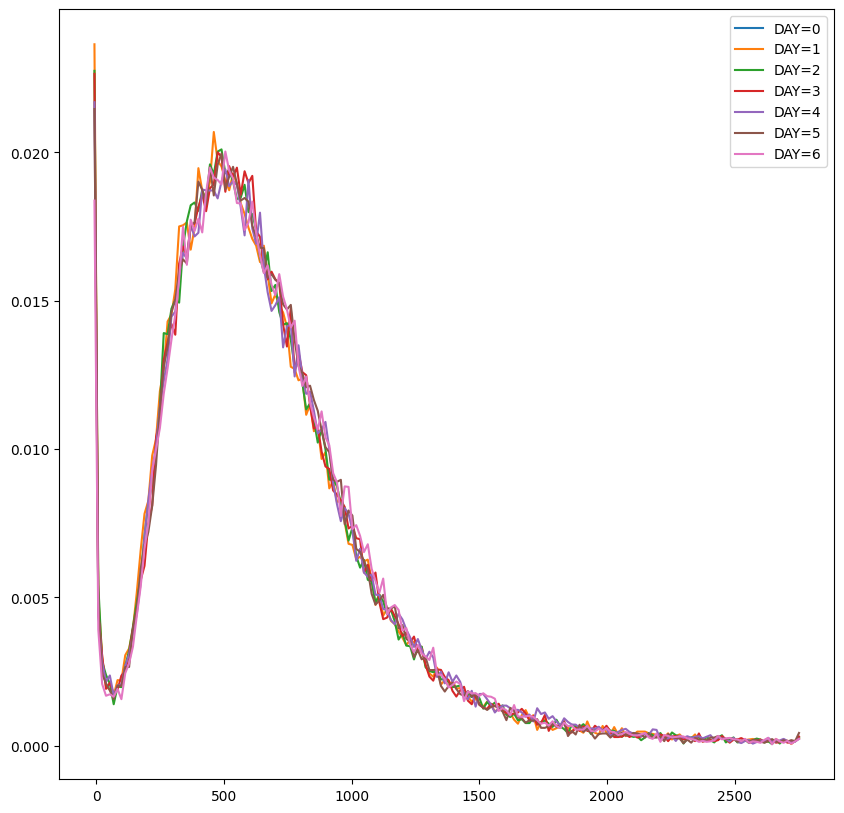

In [9]:
plt.figure(figsize=(10,10))
for v in [0, 1, 2, 3, 4, 5, 6]:
  # Filter data where the HR matches v
  hourly_data = df_trimmed[df_trimmed["DAY"] == v]["TRAVEL_TIME"]
  histogram, bin_boundary = np.histogram(hourly_data, bins=buckets)
  histogram = histogram / len(hourly_data)
  # The center is the left_bound and right_bound of a bucket
  bin_centers = [(bin_boundary[i] + bin_boundary[i + 1]) / 2 for i in range(buckets)]
  plt.plot(bin_centers, histogram, label=f"DAY={v}")
plt.legend();

In [10]:
call_type_dummies = pd.get_dummies(TRAIN_DF['CALL_TYPE'], prefix='CALL_TYPE')
missing_cols = set(['CALL_TYPE_A', 'CALL_TYPE_B', 'CALL_TYPE_C']) - set(call_type_dummies.columns)
for col in missing_cols:
    call_type_dummies[col] = False
TRAIN_DF = pd.concat([TRAIN_DF, call_type_dummies], axis=1)

# delete the old columns now that we don't need them anymore
TRAIN_DF.drop('DAY_TYPE', axis=1, inplace=True)
TRAIN_DF.drop('CALL_TYPE', axis=1, inplace=True)

TRAIN_DF.head()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,MISSING_DATA,POLYLINE,TRAVEL_TIME,YR,MON,DAY,HR,WK,CALL_TYPE_A,CALL_TYPE_B,CALL_TYPE_C
0,1372636858620000589,NaN,NaN,20000589,1372636858,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",330,2013,6,30,17,6,False,False,True
1,1372637303620000596,NaN,7.0,20000596,1372637303,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",270,2013,6,30,17,6,False,True,False
2,1372636951620000320,NaN,NaN,20000320,1372636951,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...",960,2013,6,30,17,6,False,False,True
3,1372636854620000520,NaN,NaN,20000520,1372636854,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",630,2013,6,30,17,6,False,False,True
4,1372637091620000337,NaN,NaN,20000337,1372637091,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...",420,2013,6,30,17,6,False,False,True


In [11]:
call_type_dummies = pd.get_dummies(TEST_PUBLIC_DF['CALL_TYPE'], prefix='CALL_TYPE')
missing_cols = set(['CALL_TYPE_A', 'CALL_TYPE_B', 'CALL_TYPE_C']) - set(call_type_dummies.columns)
for col in missing_cols:
    call_type_dummies[col] = False
TEST_PUBLIC_DF = pd.concat([TEST_PUBLIC_DF, call_type_dummies], axis=1)

# delete the old columns now that we don't need them anymore
TEST_PUBLIC_DF.drop('DAY_TYPE', axis=1, inplace=True)
TEST_PUBLIC_DF.drop('CALL_TYPE', axis=1, inplace=True)

TEST_PUBLIC_DF.head()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,MISSING_DATA,YR,MON,DAY,HR,WK,CALL_TYPE_A,CALL_TYPE_B,CALL_TYPE_C
0,T1,NaN,15.0,20000542,1408039037,False,2014,8,14,10,3,False,True,False
1,T2,NaN,57.0,20000108,1408038611,False,2014,8,14,10,3,False,True,False
2,T3,NaN,15.0,20000370,1408038568,False,2014,8,14,10,3,False,True,False
3,T4,NaN,53.0,20000492,1408039090,False,2014,8,14,10,3,False,True,False
4,T5,NaN,18.0,20000621,1408039177,False,2014,8,14,10,3,False,True,False


In [12]:
modified_train_zip = '../data/clean_data/class-competition-not-one-hot-encoders.zip'

with zipfile.ZipFile(modified_train_zip, 'w') as zip:
    zip.writestr("train.csv", TRAIN_DF.to_csv(index=False))
    zip.writestr("test_public.csv", TEST_PUBLIC_DF.to_csv(index=False))

KeyboardInterrupt: 